# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Carregando a base transformado ajustado para o modelo scikit-learn
df = pd.read_csv('base_para_previsao.csv')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
3,0,1,1,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,1,1,0,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [4]:
# Serando por Variável resposta 'mau'
y = df.mau
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 16650 entries, 0 to 16649
Series name: mau
Non-Null Count  Dtype
--------------  -----
16650 non-null  int64
dtypes: int64(1)
memory usage: 130.2 KB


In [5]:
# Serando por Variável explixativas
X = df.drop('mau', axis =1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    16650 non-null  int64  
 1   posse_de_veiculo                        16650 non-null  int64  
 2   posse_de_imovel                         16650 non-null  int64  
 3   qtd_filhos                              16650 non-null  int64  
 4   idade                                   16650 non-null  float64
 5   tempo_emprego                           16650 non-null  float64
 6   possui_celular                          16650 non-null  int64  
 7   possui_fone_comercial                   16650 non-null  int64  
 8   possui_fone                             16650 non-null  int64  
 9   possui_email                            16650 non-null  int64  
 10  qt_pessoas_residencia                   16650 non-null  fl

In [6]:
# Separando o Modelos para treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, train_size=0.7)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [7]:
# Definindo o objeto com a função da árvore de decisão.
clf = DecisionTreeClassifier(random_state=100)

In [8]:
# Treinando o modelo usando fit.
clf = clf.fit(X_train,y_train)

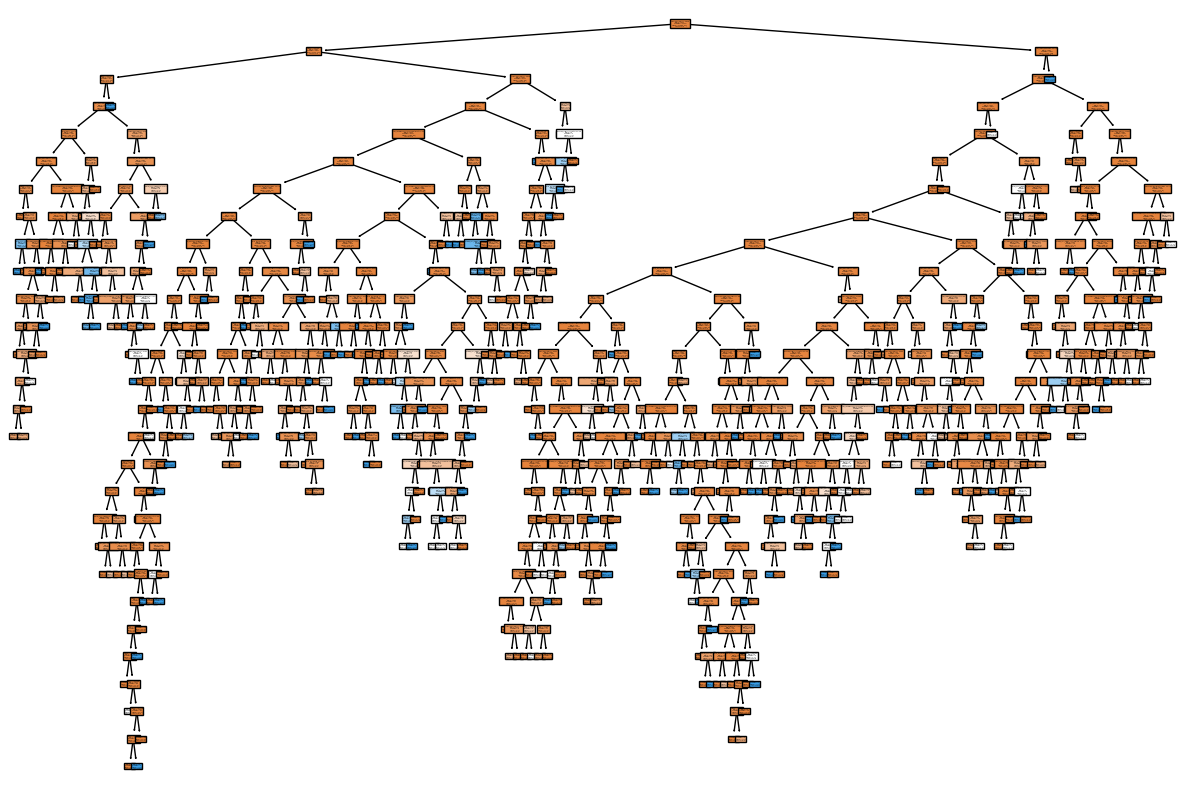

In [14]:
#Visualizando a árvore.
plt.figure(figsize=(15, 10))
plot_tree(clf,
         filled = True,
         class_names = ['Bom', 'Mau'],
         feature_names = X_train.columns.to_list());

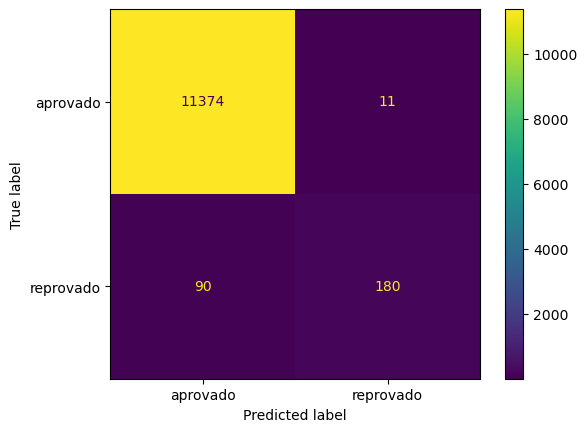

In [18]:
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels=['aprovado', 'reprovado']);

In [20]:
predict = clf.predict(X_train)

In [21]:
accuracy_score(y_train, predict)

0.9913341913341913

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

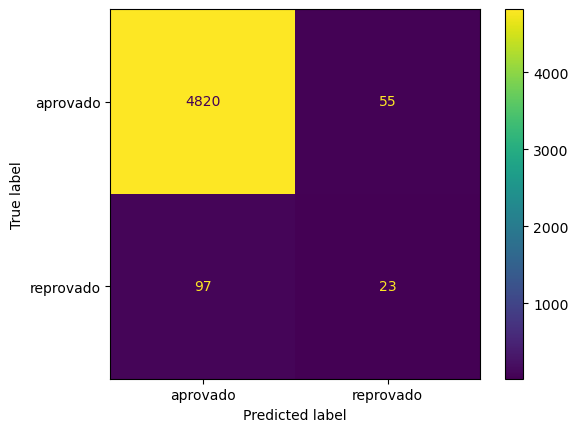

In [23]:
#Classifique a base de teste de acordo com a árvore que você treinou no item 2.
#Produza a visualização da matriz de confusão para a base de teste.
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['aprovado', 'reprovado']);

In [24]:
predict = clf.predict(X_test)

In [25]:
#Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
accuracy_score(y_test, predict)

0.9695695695695695

**A diferença da acurácia entre treino e teste foi de 0.0218% ou seja os valores da acurácia é quase aproximado, porem ainda podemos melhorar.**

In [27]:
#Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
clf_2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [28]:
clf_2 = clf.fit(X_train,y_train)

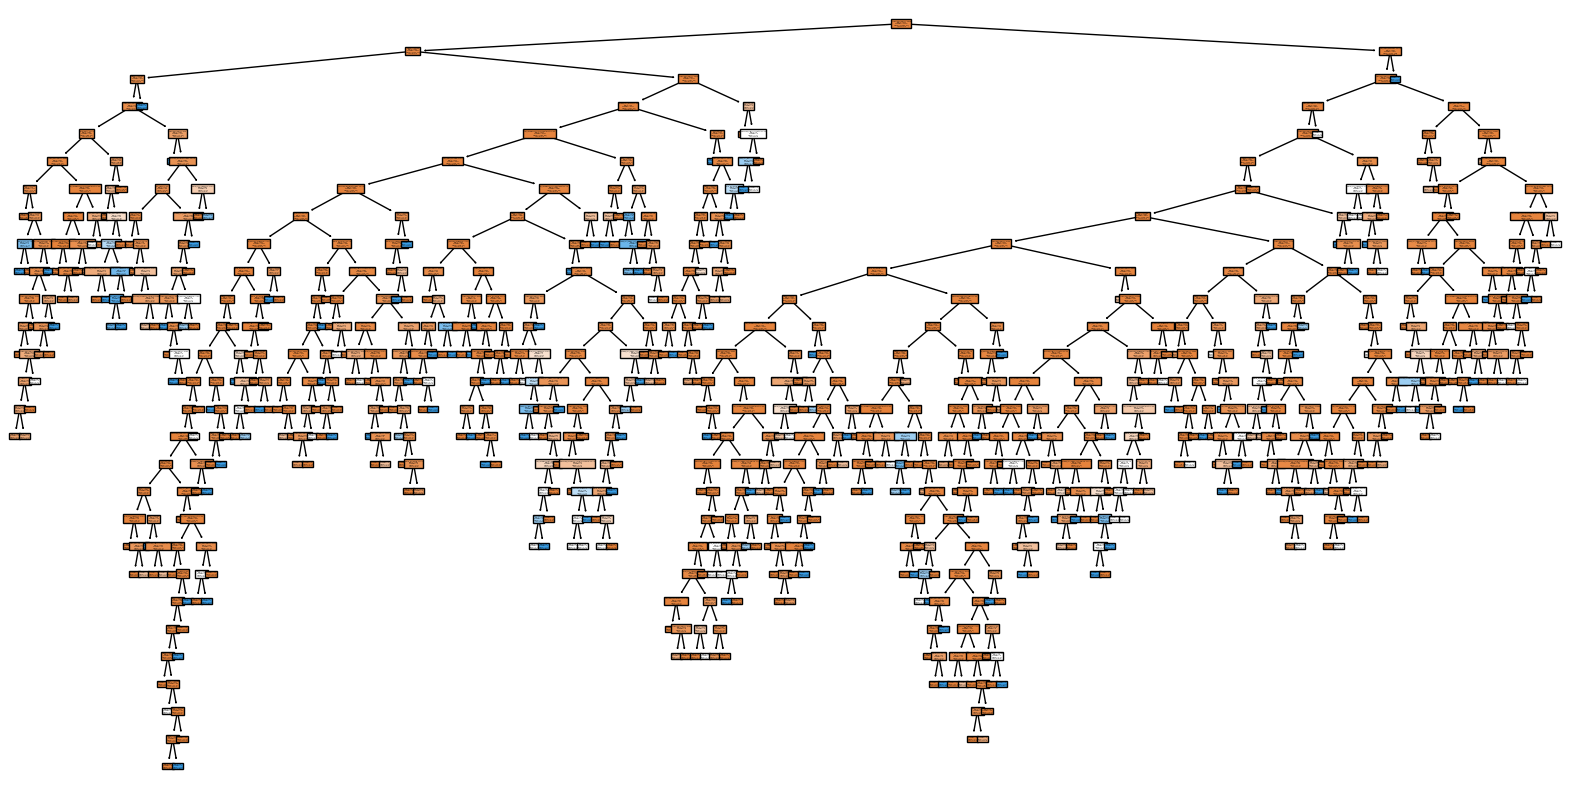

In [32]:
#Visualizando a árvore.
plt.figure(figsize=(20, 10))
plot_tree(clf_2,
         filled = True,
         class_names = ['Bom', 'Mau'],
         feature_names = X_train.columns.to_list());

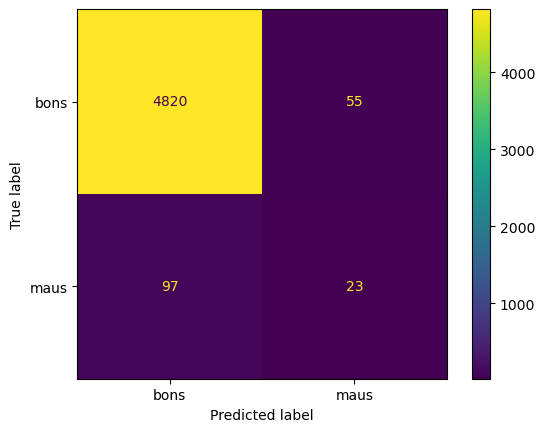

In [41]:
ConfusionMatrixDisplay.from_estimator(clf_2, X_test, y_test, display_labels=['bons', 'maus']);
#Aparentemente parece estar a mesma coisa.